# Investigate TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis I will be tackling the TMDB movies dataset which is contains information about 10,000 movies collected from The Movie Database (TMDb) and can be downloaded from [here](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000)

After loading the data I will do intensive data cleaning of the dataset to have more 'normal' movies and no outliers in order to have the conclusions generalizable and useful.

The questions to explore :

**1- How much revenue returns to the investors compared to the budget ?**
* I'll plot the distribution of how effective is an investment in movies by comparing the revenue to the intial budget

**2- Does certain movie genres have better chances at getting more revenue and profits ?**
* I'll explore answers to this question by getting the sum and average revenues and profits of each genre and also seeing the top movies genres

**3- Have certain production companies found a recipe for success of a movie (high success percentages) ?**
* I'll explore this question by getting the average revenues and profits of each production company that created more than twenty movies


<a id='wrangling'></a>
## Data Wrangling


In [234]:
# used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [235]:
#read the data and check that it is read correctly
raw = pd.read_csv('tmdb-movies.csv')
raw.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

### General Data Exploration and cleaning:

In [236]:
raw.shape

(10866, 21)

In [237]:
raw.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

notes from output:

* unique imdb_id and original_title records are less than total number of records which may imply having duplicates

* unique budget values are too low compared to number of records and it is not near number of unique budget_adj values which is weird given the defintion of adj columns:
"The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time"

* having less than half of revenues are unique values is fishy as well and may imply that these are rounded values some how


#### Confirming and cleaning duplicates assumption

In [238]:
raw.duplicated().sum()

1

looks like there is a duplicate record as predicted

In [239]:
raw.drop_duplicates(inplace=True)
raw.shape

(10865, 21)

#### Duplicated original_title exploration

In [240]:
duplicate_titles = raw.original_title.value_counts() [raw.original_title.value_counts() > 1]
duplicate_titles

Hamlet                  4
Emma                    3
Frankenstein            3
The Three Musketeers    3
Alice in Wonderland     3
                       ..
Man of the House        2
Loverboy                2
The Crazies             2
Night of the Demons     2
Jack Frost              2
Name: original_title, Length: 276, dtype: int64

In [241]:
titles=list(duplicate_titles.index)
duplicate_records=raw[raw.original_title.isin(titles)].sort_values(by='original_title')
duplicate_records.head(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5724,217316,tt2518788,0.364669,0,0,1,Michael Fassbender|Niki Lauda|Michael Schumach...,https://www.facebook.com/1thefilm,Paul Crowder,The True Story of the Drivers Who Risked Their...,speed|racing|formula 1|race car driver,Set in the golden era of Grand Prix Racing '1'...,112,Documentary,Exclusive Media Group|Universum Film (UFA)|Spi...,9/30/13,25,7.6,2013,0.000000e+00,0.000000e+00
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,college|chaos|party|violence,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000e+00
1400,12244,tt0472033,2.846465,30000000,48428063,9,Elijah Wood|John C. Reilly|Jennifer Connelly|C...,NaN,Shane Acker,When our world ended their mission began.,man vs machine|hope|post-apocalyptic|dystopia|...,"When 9 first comes to life, he finds himself i...",79,Action|Adventure|Animation|Science Fiction|Thr...,Focus Films|Starz Animation|Relativity Media|T...,8/19/09,851,6.5,2009,3.049201e+07,4.922230e+07
6514,98622,tt0443424,0.128484,0,0,9,NaN,http://www.shaneacker.com,Shane Acker,NaN,soul|end of world,A rag doll fights a monster that has been stea...,11,Animation|Fantasy,NaN,4/21/05,49,7.3,2005,0.000000e+00,0.000000e+00
1416,17979,tt1067106,1.714887,200000000,325233863,A Christmas Carol,Gary Oldman|Jim Carrey|Steve Valentine|Daryl S...,http://disney.go.com/disneypictures/achristmas...,Robert Zemeckis,Season's Greedings,holiday|victorian england|money|christmas eve|...,Miser Ebenezer Scrooge is awakened on Christma...,96,Animation|Drama,Walt Disney|ImageMovers,11/4/09,619,6.6,2009,2.032801e+08,3.305678e+08
2489,16716,tt0216621,0.521573,0,0,A Christmas Carol,Patrick Stewart|Richard E. Grant|Joel Grey|Ian...,NaN,David Hugh Jones,NaN,holiday|scrooge|ghost,Scrooge is a miserly old businessman in 1840's...,95,Drama|Fantasy,Turner Network Television (TNT)|Hallmark Enter...,12/5/99,23,6.1,1999,0.000000e+00,0.000000e+00
7917,13189,tt0087056,0.542315,0,0,A Christmas Carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,holiday|future|scrooge|christmas,An old bitter miser who makes excuses for his ...,100,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000e+00
1994,23437,tt1179056,1.074308,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,freddy krueger|reboot,The film that brings back horror icon Freddy K...,95,Horror|Mystery|Thriller,New Line Cinema|Platinum Dunes,4/30/10,423,5.5,2010,3.500000e+07,1.156640e+08
7891,377,tt0087800,1.331432,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",child murderer|sleep|coffee|hat|nightmare,Teenagers in a small town are dropping like fl...,91,Horror,New Line Cinema|Smart Egg Pictures,11/15/84,625,7.1,1984,3.778276e+06,5.353504e+07
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,womanizer|playboy,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


They look like different movies with the same name , with different cast and production years and some of them are remakes
so no cleaning is necessary

#### Unuseful features removal
* removing unuseful features in the analysis that cannot be generalized easily into components of success of a movie

In [245]:
#creating a dataframe containing subset of features of original raw df for analysis
df=raw.drop(['homepage', 'tagline', 'imdb_id','overview', 'id', 'original_title'], axis=1)
df.head(2)

,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Datatypes cleaning
* budget_adj and revenue_adj should be integers because decimals are negligible
* release_date should be a datetime type

In [246]:
#check types again and values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   keywords              9372 non-null   object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

In [247]:
# make release date in a better format before converting its type
df.release_date = df.apply(lambda x : x.release_date[:-2]+ str(x.release_year)  ,axis=1)
# remove the unneeded column of release year
df.drop(['release_year'], axis=1, inplace=True);
df.release_date = pd.to_datetime(df['release_date'],format='%m/%d/%Y')
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [248]:
#check that everything is correct
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
budget_adj                       int64
revenue_adj                      int64
dtype: object

Now all datatypes are correct.

#### Starting to see statistical distribution of numerical columns

In [249]:
desc=df.describe()
desc

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


Notes from the statisticts:
* popularity maximum looks like an outlier that is way bigger than quantile ranges
* the budget and revenue first and second quantile ranges are at zero, we'll need to remove all these from the dataset to get an informative analysis
* the maximum of runtime feature is way too big, we'll need to keep movies in normal ranges only (from 60 minutes to 180 minutes)
* the vote_count maximum seems too big as well

#### removing outliers

Removing all values using the 1.5 Interquartile range rule, where all values below Q1-IQR *1.5 are removed and all values above Q3 + 1.5* IQR are removed as well with the exception of revenue and budget because the analysis plans on studying the features that cause high revenues (and high budgets are needed to confirm whether they are a fearue)

In [250]:
def remove_outliers(df):
    desc=df.describe()
    Q1 = desc.loc['25%']
    Q3 = desc.loc['75%']
    IQR = Q3 - Q1
    IQR_thresh = IQR * 1.5
    print('columns min and max thresholds:')
    for col in desc.columns:
        min_thresh= max(0,Q1[col]-IQR_thresh[col])
        max_thresh = min(Q3[col]+ IQR_thresh[col], desc.loc['max'][col])
        print([col, min_thresh, max_thresh])
        if('budget' in col or 'revenue' in col):
            # remove low values only because high ones needed for analysis
            df = df[ ( df[col] > min_thresh )]
        else:
            df = df[ ( df[col] > min_thresh ) & (df[col] < max_thresh) ]
    return df

In [257]:
df = remove_outliers(df)

columns min and max thresholds:
['popularity', 0, 1.4437366249999999]
['budget', 0, 64837500.0]
['revenue', 0, 125626645.625]
['runtime', 64.0, 142.0]
['vote_count', 0, 339.0]
['vote_average', 3.750000000000001, 7.9]
['budget_adj', 0, 86495402.375]
['revenue_adj', 0, 172994823.125]


In [258]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,2200.000000,2.200000e+03,2.200000e+03,2200.000000,2200.000000,2200.000000,2.200000e+03,2.200000e+03
mean,0.585664,2.347769e+07,3.993460e+07,104.603182,118.324091,5.942318,3.016655e+07,5.854021e+07
std,0.304644,2.449369e+07,5.401237e+07,14.011633,89.342177,0.731041,2.940346e+07,8.780136e+07
min,0.001117,1.200000e+04,1.028900e+04,66.000000,10.000000,3.800000,1.647900e+04,1.148800e+04
25%,0.350330,6.775000e+06,7.368240e+06,94.000000,42.000000,5.400000,9.723160e+06,9.557241e+06
50%,0.543910,1.600000e+07,2.244892e+07,103.000000,93.000000,6.000000,2.112123e+07,3.132236e+07
75%,0.786803,3.000000e+07,5.461699e+07,114.000000,180.000000,6.500000,4.043206e+07,7.466488e+07
max,1.443406,4.250000e+08,1.106280e+09,141.000000,338.000000,7.800000,4.250000e+08,1.583050e+09


It is clear now that the numbers are doing better but still these min budget and revenues are too low to be true

In [259]:
raw.loc[df.query('budget <10000 | revenue < 10000').index]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


by examining the data of low budget and revenues , some of them are famous movies but their numbers are just not accurate so they will be considered outliers and removed as well for the sake of the analysis

In [260]:
df=df.query('budget > 10000 & revenue > 10000')

In [261]:
df.shape

(2200, 14)

In [262]:
df.shape[0]/raw.shape[0] * 100

20.24850437183617

Now after cleaning is done, I can see that only 20% of data is left out of the original dataset

#### General Statistical Exploration

In [263]:
df['profit']= df.revenue - df.budget
df['profit_adj']= df.revenue_adj - df.budget_adj

/Users/kareem.abdelsalam/Downloads/Program/anaconda3/envs/de-jobs/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/kareem.abdelsalam/Downloads/Program/anaconda3/envs/de-jobs/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/kareem.abdelsalam/Downloads/Program/anaconda3/envs/de-jobs/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use

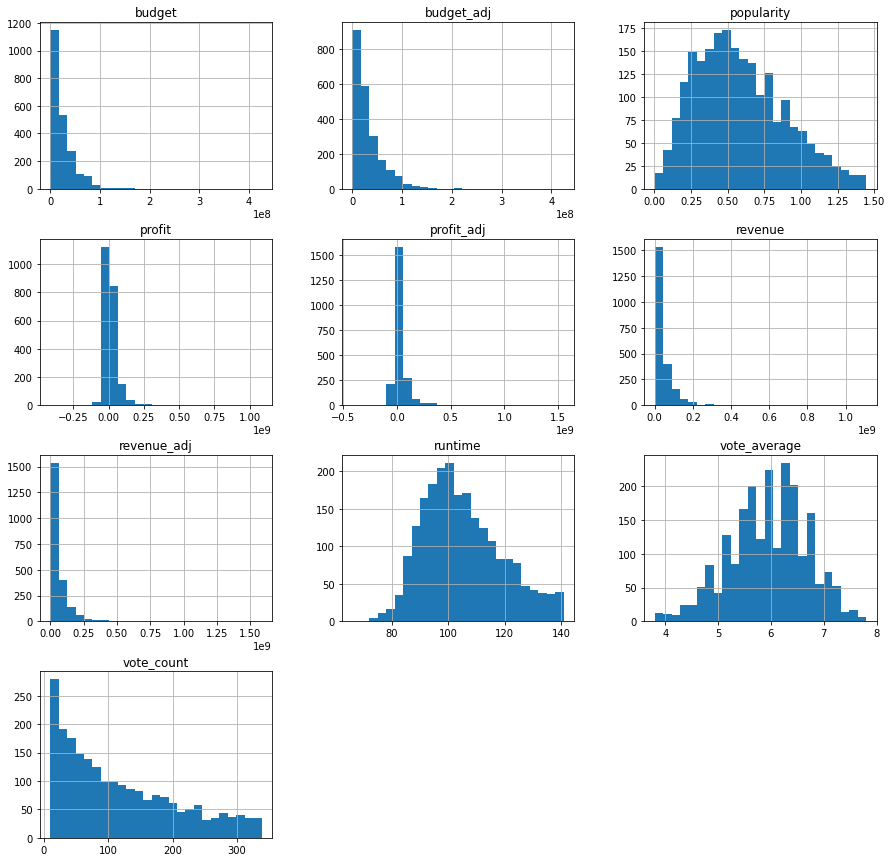

In [264]:
df.hist(figsize=(15,15),bins=25);

These were the distributions of all the datset numerical columns, All money related features are right skewed and also the vote_count

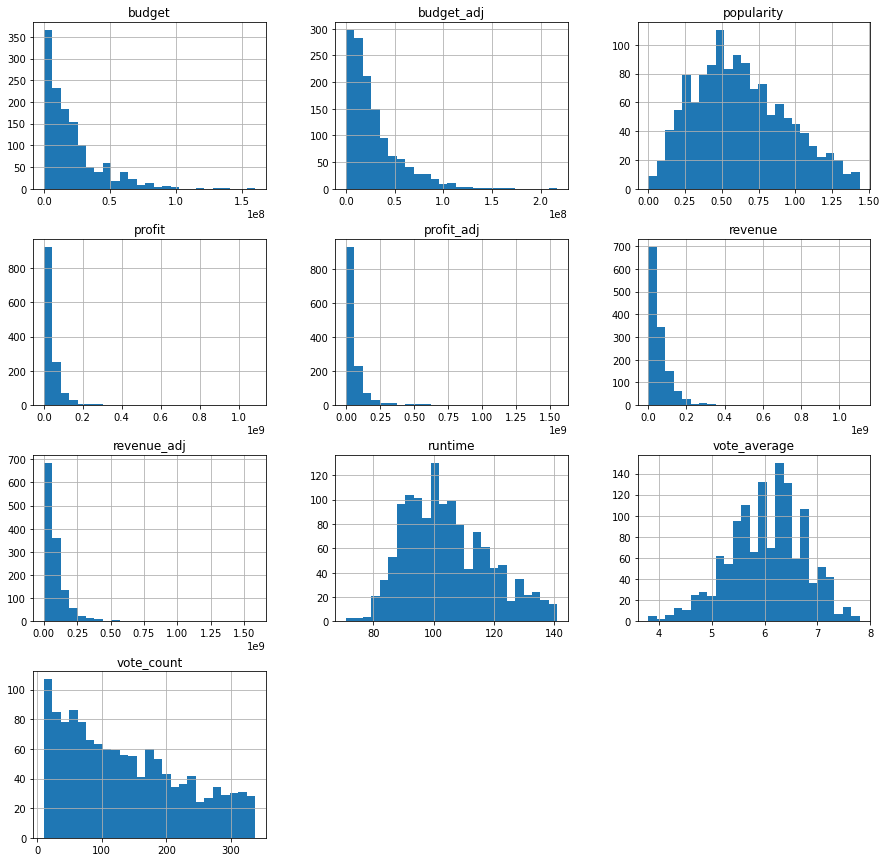

In [265]:
# break even and profitable movies distributions:
df[df.profit >0].hist(figsize=(15,15),bins=25);

These were the distributions of Profitable movies (revenue > budget) to see how they differ from the whole dataset, we can see that the vote_count is less right skewed here indicating more vote counts

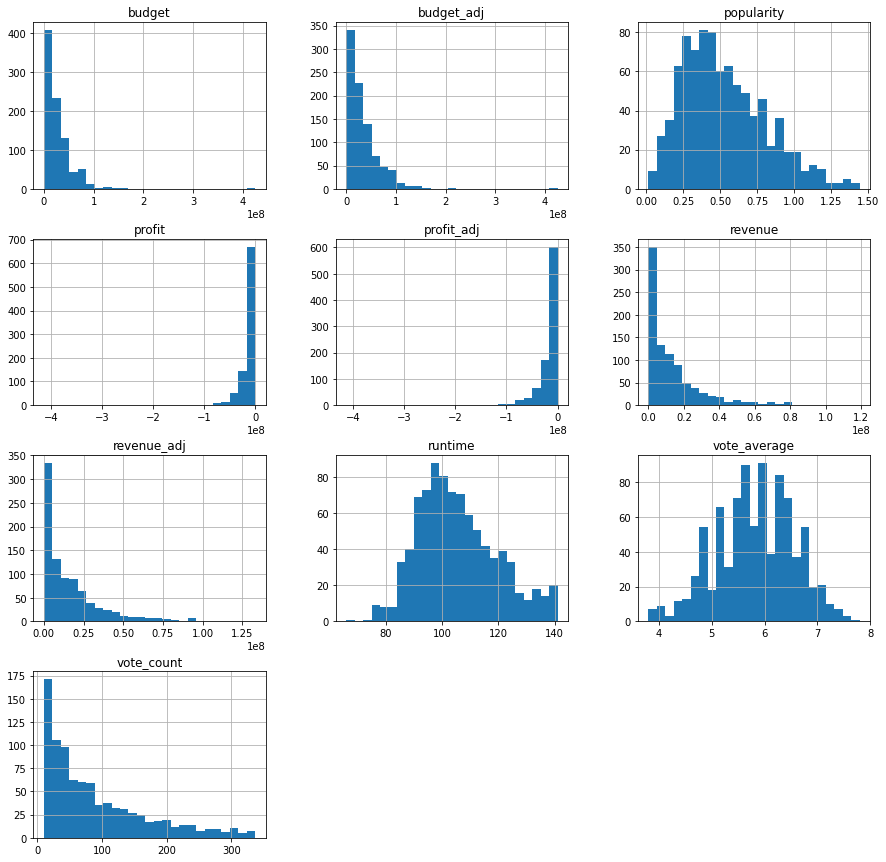

In [267]:
# non-profitable movies distributions:
df[df.profit < 0].hist(figsize=(15,15),bins=25);

Looks like very high budget is more related to non-profitable movies and that profitable ones has higher vote counts.
The distribution is very similar in the rest of the metrics.

#### Data Balance check:

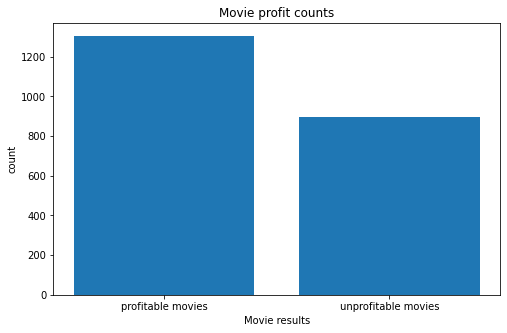

In [268]:
n_profitable=df[df.profit >0].shape[0]
n_total=df.shape[0]
plt.subplots(figsize=(8, 5))

plt.bar(['profitable movies', 'unprofitable movies'], [n_profitable,n_total-n_profitable])

plt.title("Movie profit counts")

plt.xlabel("Movie results")

plt.ylabel("count")
plt.show();

The cleaned dataset has more profitable moview than unprofitable ones, this is a thing to keep in mind during the analysis

## How much revenue returns to the investors compared to the budget ?

In [269]:
df['money_back_percent']= df.revenue/df.budget

money_back_percent is how much the revenue is compared to the budget which should be an important metric for an investor

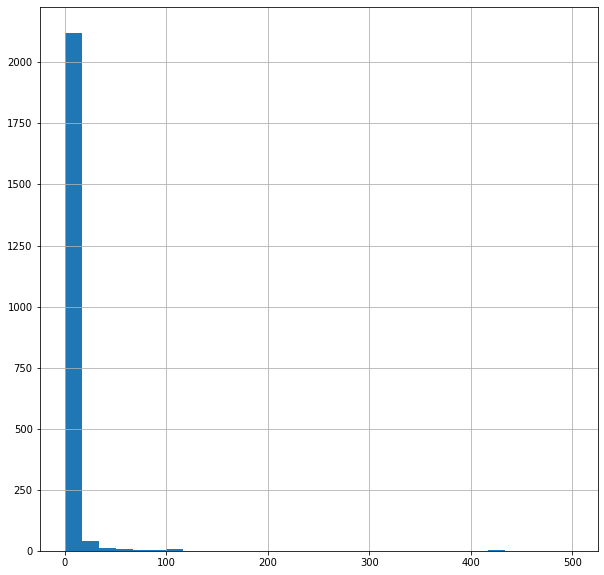

In [270]:
df.money_back_percent.hist(bins=30, figsize=(10,10))

In [271]:
df[df.money_back_percent > 100]

,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit,profit_adj,money_back_percent
242,0.532205,100000,42664410,Cassidy Gifford|Ryan Shoos|Pfeifer Brown|Reese...,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87,Horror|Thriller,New Line Cinema|Blumhouse Productions|Manageme...,2015-07-10,247,5.0,91999,39251239,42564410,39159240,426.644100
1372,0.137351,230000,25000000,Martin Speer|Russ Grieve|John Steadman|James W...,Wes Craven,rape|mutation|government|murder|blood,89,Horror,Blood Relations Co.,1977-07-22,57,6.0,827489,89944525,24770000,89117036,108.695652
2207,0.346071,30000,3045943,Megan Faccio|Melody C. Roscher|Ariel Schulman|...,Henry Joost|Ariel Schulman,aftercreditsstinger,87,Documentary,Hit the Ground Running Films,2010-09-17,125,6.4,30000,3045943,3015943,3015943,101.531433
4560,0.491648,1000000,101758490,Fernanda Andrade|Simon Quarterman|Evan Helmuth...,William Brent Bell,rome|exorcism|death|demonic possession|found f...,83,Thriller|Horror,Room 101|Prototype,2012-01-06,162,4.5,949744,96644543,100758490,95694799,101.758490
6284,0.733587,169000,18564702,Rowan Atkinson|Kristin Scott Thomas|Maggie Smi...,Niall Johnson,golf|planned murder|killer|housekeeper|extrama...,103,Comedy,Summit Entertainment,2005-12-02,73,6.5,188699,20728664,18395702,20539965,109.850308
6821,0.206454,100000,10178331,James Blackwell|Alex Kendrick|Shannen Fields|C...,Alex Kendrick,christian|sport|aftercreditsstinger,111,Drama,Destination Films,2006-09-29,41,6.8,108166,11009586,10078331,10901420,101.783310
7057,0.762134,130000,54667954,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,diving|cataclysm|nightmare|panic|red sea,79,Drama|Thriller,Plunge Pictures LLC,2004-08-06,171,5.3,150077,63111168,54537954,62961091,420.522723
7087,0.577759,400000,46118097,Jon Heder|Aaron Ruell|Jon Gries|Efren Ramirez|...,Jared Hess,underdog|brother brother relationship|idaho|hi...,95,Comedy,Access Films|Napoleon Pictures Limited|Carniva...,2004-06-11,290,6.6,461778,53240824,45718097,52779046,115.295243
7178,0.263897,65000,28575078,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,Morgan Spurlock,experiment|health|junk food|food industry|fast...,100,Documentary|Comedy|Drama,Kathbur Pictures,2004-01-17,295,6.5,75038,32988367,28510078,32913329,439.616585
7277,0.412913,12000,6000000,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,gay|trailer park|pop culture|drug dealer|heroin,93,Comedy,Dreamland Productions,1972-03-12,51,6.3,62574,31287365,5988000,31224791,500.000000


Looks like there were some movies that have crazy high revenues more than 100 times the budget !

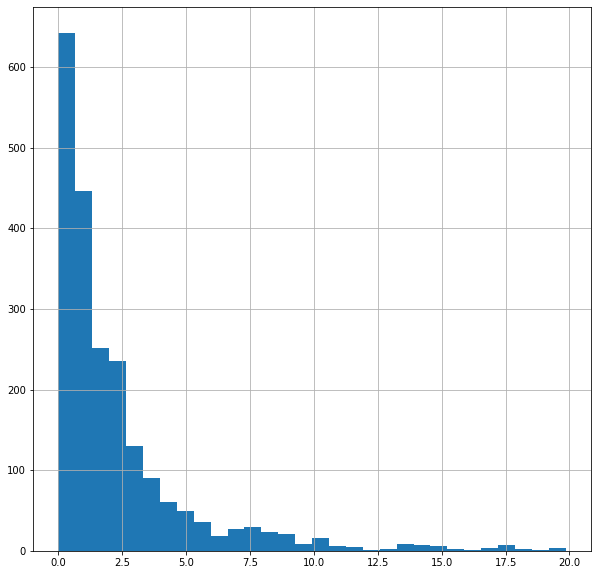

In [272]:
#seeing histogram of more normal revenues
df[df.money_back_percent < 20].money_back_percent.hist(bins=30, figsize=(10,10))

Most movies returned less than 3 times the initial investment

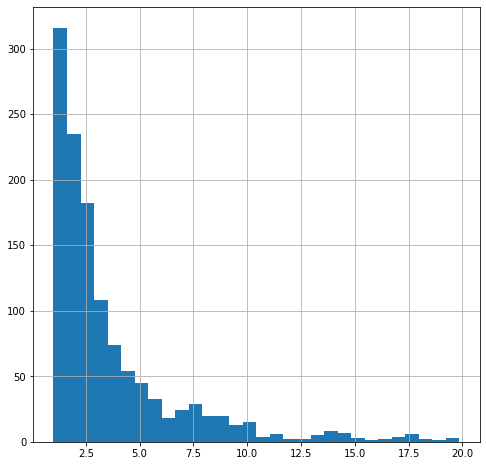

In [273]:
#normal revenue movies that broke even and returned initial investment
df[(df.money_back_percent < 20) & (df.money_back_percent > 1)].money_back_percent.hist(bins=30, figsize=(8,8))

## What genres are more associated with highest profit movies ?

In [274]:
# feature exploder
def row_exploder(row, feature, splitter):
    lst=row[feature].split(splitter)
    new_rows=[]
    for item in lst:
        new_row = row.copy()
        new_row[feature]=item
        new_rows.append(new_row)
    return pd.concat(new_rows,axis=1).transpose()
def feature_exploder(df, feature, splitter):
    df = df[pd.notna(df[feature])]
    for i in df.index:
        new_rows = row_exploder(df.loc[i], feature, splitter)
        df.drop(new_rows.index[0],inplace=True)
        df=df.append(new_rows)
    return df.reset_index()

In [275]:
exploded_genres= feature_exploder(df, 'genres', '|')

Exploading mean making a row for each genre in order to facilitate aggregations.

some health checks:

In [276]:
exploded_genres.head()

,index,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit,profit_adj,money_back_percent
0,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama,Denver and Delilah Productions|Mandalay Vision...,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
1,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Mystery,Denver and Delilah Productions|Mandalay Vision...,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
2,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Thriller,Denver and Delilah Productions|Mandalay Vision...,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
3,115,1.38803,11000000,61619773,Helen Mirren|Ryan Reynolds|Tatiana Maslany|Kat...,Simon Curtis,nazis|art|stolen painting,120,Drama,BBC Films|Origin Pictures,2015-04-10,277,7.3,10119995,56690166,50619773,46570171,5.6018
4,124,1.33832,10000000,78099553,Chris J. Murray|Brit Shaw|Ivy George|Lauren Fr...,Gregory Plotkin,terror|supernatural|sequel|demon|found footage,88,Horror,Paramount Pictures|Blumhouse Productions,2015-10-21,267,5,9199995,71851557,68099553,62651562,7.80996


In [277]:
exploded_genres.shape

(5668, 18)

In [278]:
exploded_genres.dtypes

index                            int64
popularity                      object
budget                          object
revenue                         object
cast                            object
director                        object
keywords                        object
runtime                         object
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                      object
vote_average                    object
budget_adj                      object
revenue_adj                     object
profit                          object
profit_adj                      object
money_back_percent              object
dtype: object

Looks like my row exploader function changed the data types !

In [279]:
def change_types(df):
    int_columns= ['budget', 'revenue', 'profit','budget_adj', 'revenue_adj','profit_adj', 'runtime','vote_count','vote_average']
    float_columns = ['popularity', 'money_back_percent']
    for int_col in int_columns:
        df[int_col] = df[int_col].astype(int)
    for float_col in float_columns:
        df[float_col] = df[float_col].astype(float)
    return df
        

In [280]:
exploded_genres = change_types(exploded_genres)

In [281]:
exploded_genres.dtypes

index                            int64
popularity                     float64
budget                           int64
revenue                          int64
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                     int64
budget_adj                       int64
revenue_adj                      int64
profit                           int64
profit_adj                       int64
money_back_percent             float64
dtype: object

Now data types are back to normal.

In [282]:
profits=exploded_genres.groupby(['genres'])['profit']

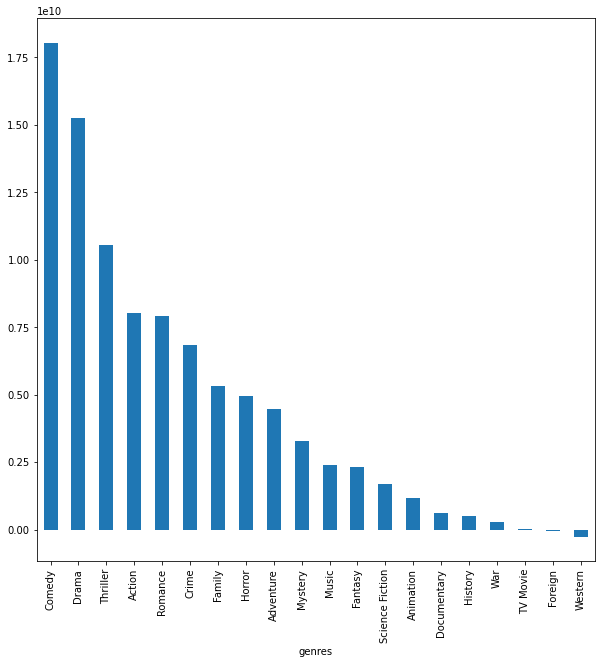

In [283]:
profits.sum().sort_values(ascending=False).plot(
    figsize=(10,10), kind='bar', rot=90)

Looks like the total profits in comedy movies in our dataset is the largest of all! But is that because there are just high number of comedy movies?

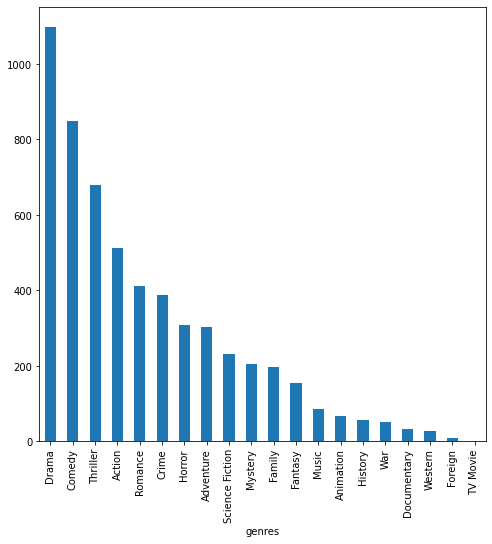

In [284]:
exploded_genres.groupby('genres').index.count().sort_values(ascending=False).plot(kind='bar', figsize=(8,8))

Looks like the most profitable genres are the most ones in the dataset but in a slightly different order, so we cannot judge by that !
The mean profits of each genre should give us more insight.

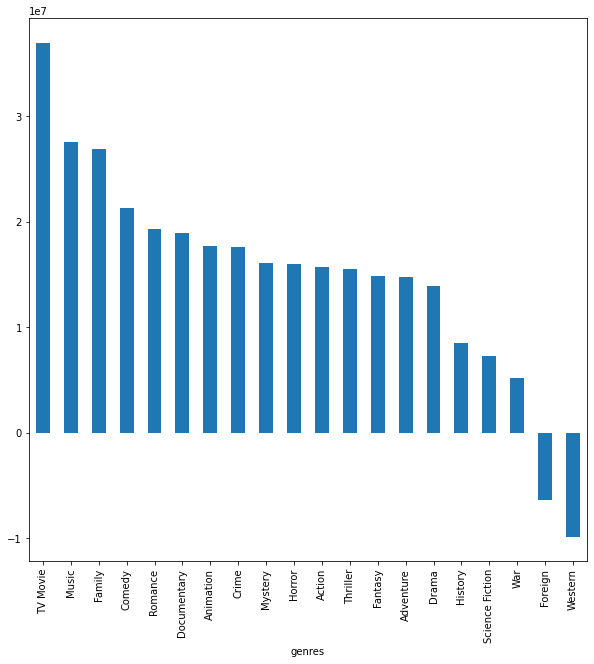

In [285]:
profits.mean().sort_values(ascending=False).plot(
    figsize=(10,10), kind='bar', rot=90)

After looking at mean profit of each genre, it looks like we have new winners !
But the drawback of using mean values is that it is sensitive to outliers so they cannot be used independently without the five number summary to validate assumptions.

In [286]:
prof_numbers=profits.describe()
prof_numbers

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,511.0,1.573255e+07,7.121959e+07,-413912431.0,-10452845.50,2942221.0,29219580.50,1.084280e+09
Adventure,303.0,1.473637e+07,5.647818e+07,-413912431.0,-11127578.50,6885000.0,35949821.50,4.249875e+08
Animation,67.0,1.768598e+07,7.460249e+07,-111007242.0,-14425603.00,1731128.0,26635882.50,4.249875e+08
Comedy,848.0,2.128864e+07,4.680971e+07,-92896027.0,-3592725.50,8115774.5,31145308.50,3.232035e+08
Crime,389.0,1.761235e+07,6.569340e+07,-71626175.0,-6714803.00,3048693.0,28908987.00,1.084280e+09
Documentary,32.0,1.898720e+07,3.042809e+07,-2986692.0,-6600.00,4120435.5,29107558.50,1.131145e+08
Drama,1097.0,1.390529e+07,5.066322e+07,-71331093.0,-6924280.00,1082891.0,21627431.00,1.084280e+09
Family,198.0,2.686989e+07,5.874914e+07,-111007242.0,-7567520.75,13090541.5,48905270.75,4.249875e+08
Fantasy,156.0,1.487711e+07,6.921262e+07,-413912431.0,-12067520.75,4220498.0,25705832.75,4.249875e+08


TV Movie genre looked like a winner from means but it looks like it won just because there is not enough representative samples.
so it is better to see only the ones that have at least 50 samples to be somehow a representative sample of the genre

In [287]:
prof_numbers[prof_numbers['count'] > 50]

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,511.0,1.573255e+07,7.121959e+07,-413912431.0,-10452845.50,2942221.0,29219580.50,1.084280e+09
Adventure,303.0,1.473637e+07,5.647818e+07,-413912431.0,-11127578.50,6885000.0,35949821.50,4.249875e+08
Animation,67.0,1.768598e+07,7.460249e+07,-111007242.0,-14425603.00,1731128.0,26635882.50,4.249875e+08
Comedy,848.0,2.128864e+07,4.680971e+07,-92896027.0,-3592725.50,8115774.5,31145308.50,3.232035e+08
Crime,389.0,1.761235e+07,6.569340e+07,-71626175.0,-6714803.00,3048693.0,28908987.00,1.084280e+09
Drama,1097.0,1.390529e+07,5.066322e+07,-71331093.0,-6924280.00,1082891.0,21627431.00,1.084280e+09
Family,198.0,2.686989e+07,5.874914e+07,-111007242.0,-7567520.75,13090541.5,48905270.75,4.249875e+08
Fantasy,156.0,1.487711e+07,6.921262e+07,-413912431.0,-12067520.75,4220498.0,25705832.75,4.249875e+08
History,57.0,8.551208e+06,3.955632e+07,-119180039.0,-9346349.00,4309223.0,34586584.00,1.019567e+08


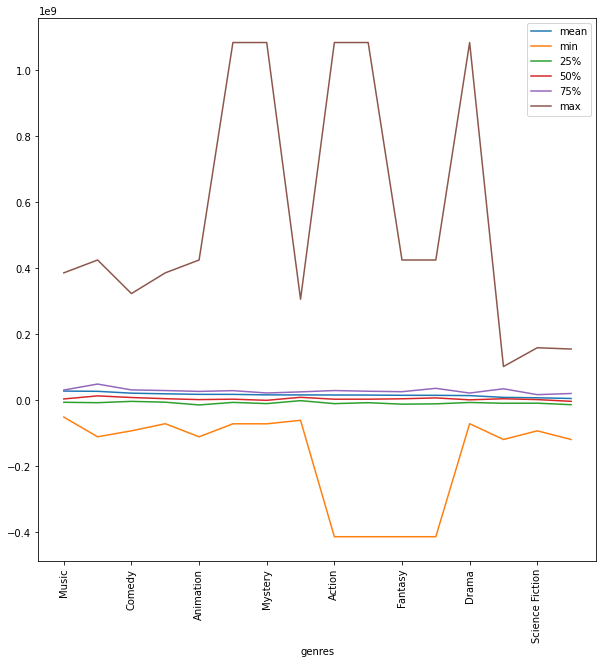

In [288]:
big_sample=prof_numbers[prof_numbers['count'] > 50]
important=['mean','min','max','25%','50%','75%']
big_sample.loc[:,big_sample.columns.isin(important)].sort_values(by=['mean'],
                                                                 ascending=False).plot(
    figsize=(10,10), rot=90)

Plotting max and min makes observing other metrics harder.

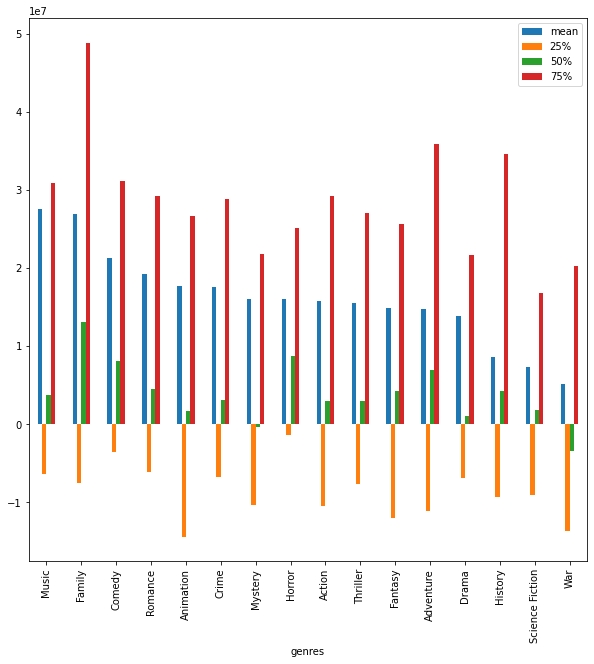

In [289]:
no_extremes=['mean','25%','50%','75%']
big_sample.loc[:,big_sample.columns.isin(no_extremes)].sort_values(by=['mean'], ascending=False).plot(
    figsize=(10,10), rot=90, kind='bar')

From looking at both the mean and the five number summary we can conclude that
* At least 25% of each movie genre produced movies lose money and do not break even
* Family movies look like a winner given the means nd the median but they tend to have higher losses than music movies which is a close competitior, that indicates higher production costs or maybe because there is not enought Music movies samples
* Comedy looks the safest given all metrics (large sample size, low 1st quantile, high mean) but Family is the most promising given that great 3rd quantile
* Animation is doing good numbers but its losses are a big risk especially due to their high production costs and that can be seen by the low median and 1st quantile
* Mistery has one of the highest maximum values but it is a risky bet as well

Now to compare all money metrics of movie genres:

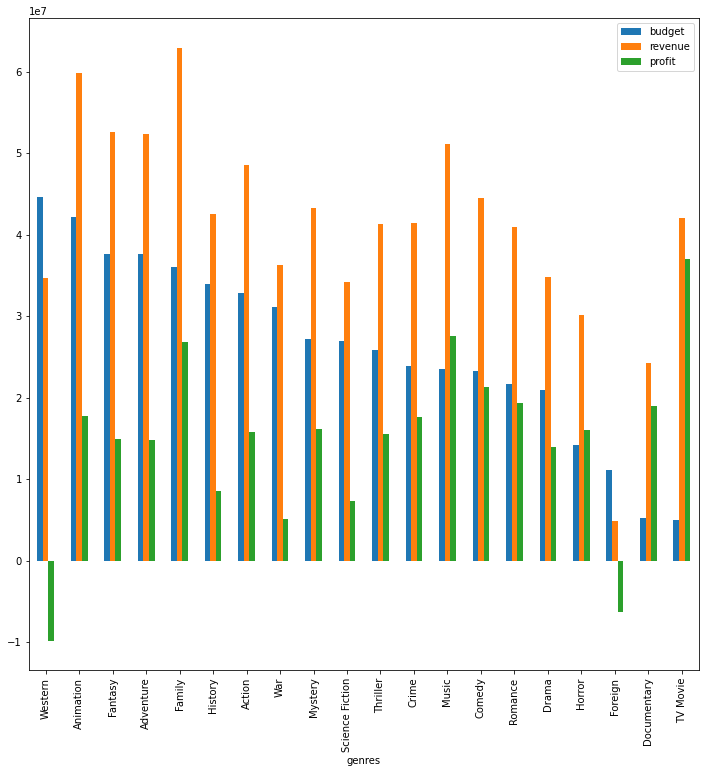

In [290]:
money_columns=['budget','revenue','profit','genres']
exploded_genres.loc[:,exploded_genres.columns.isin(money_columns)].groupby('genres').mean(
).sort_values(ascending=False, by=['budget','revenue']).plot(kind='bar', figsize=(12,12), rot=90)

* When compaing average budgets of the interesting genres from the last section Music and Comedy take the edge over Family movies because they have lower average production costs and competitive profits
* We confirmed here that Animation, Fantasy and Adventure movies have the highest average budgets in all genres that have enough samples which confirms that they are risky bets compared to Family, Music, Comedy and Romance

## Have certain production companies learned a recipe for generating profitable movies ?

In [291]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
budget_adj                       int64
revenue_adj                      int64
profit                           int64
profit_adj                       int64
money_back_percent             float64
dtype: object

In [292]:
exploded_companies= feature_exploder(df, 'production_companies', '|')

/Users/kareem.abdelsalam/Downloads/Program/anaconda3/envs/de-jobs/lib/python3.7/site-packages/pandas/core/frame.py:3982: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Health checks:

In [293]:
exploded_companies.head()

,index,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit,profit_adj,money_back_percent
0,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama|Mystery|Thriller,Denver and Delilah Productions,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
1,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama|Mystery|Thriller,Mandalay Vision,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
2,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama|Mystery|Thriller,Exclusive Media Group,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
3,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama|Mystery|Thriller,Hugo Productions,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294
4,111,1.44341,20000000,208588,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,prison|based on novel|brother sister relations...,113,Drama|Mystery|Thriller,Cuatro Plus Films,2015-03-31,322,5.7,18399991,191900,-19791412,-18208091,0.0104294


In [294]:
exploded_companies.shape

(5472, 18)

In [295]:
exploded_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 5472 non-null   int64         
 1   popularity            5472 non-null   object        
 2   budget                5472 non-null   object        
 3   revenue               5472 non-null   object        
 4   cast                  5471 non-null   object        
 5   director              5472 non-null   object        
 6   keywords              5208 non-null   object        
 7   runtime               5472 non-null   object        
 8   genres                5472 non-null   object        
 9   production_companies  5472 non-null   object        
 10  release_date          5472 non-null   datetime64[ns]
 11  vote_count            5472 non-null   object        
 12  vote_average          5472 non-null   object        
 13  budget_adj        

In [296]:
exploded_companies = change_types(exploded_companies)

In [297]:
exploded_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 5472 non-null   int64         
 1   popularity            5472 non-null   float64       
 2   budget                5472 non-null   int64         
 3   revenue               5472 non-null   int64         
 4   cast                  5471 non-null   object        
 5   director              5472 non-null   object        
 6   keywords              5208 non-null   object        
 7   runtime               5472 non-null   int64         
 8   genres                5472 non-null   object        
 9   production_companies  5472 non-null   object        
 10  release_date          5472 non-null   datetime64[ns]
 11  vote_count            5472 non-null   int64         
 12  vote_average          5472 non-null   int64         
 13  budget_adj        

In [298]:
comp_col='production_companies'
companies= exploded_companies.groupby(comp_col)
companies.describe()

index                                            \
                         count         mean          std     min     25%   
production_companies                                                       
1019 Entertainment         1.0   350.000000          NaN   350.0   350.0   
10th Hole Productions      3.0  3391.666667  2120.786961  2055.0  2169.0   
11:11 Mediaworks           1.0  6655.000000          NaN  6655.0  6655.0   
120dB Films                1.0  5837.000000          NaN  5837.0  5837.0   
1492 Pictures              3.0  5892.000000  2869.920556  2802.0  4601.0   
...                        ...          ...          ...     ...     ...   
double A Films             1.0  8797.000000          NaN  8797.0  8797.0   
erbp                       1.0  5661.000000          NaN  5661.0  5661.0   
iDeal Partners Film Fund   1.0  2202.000000          NaN  2202.0  2202.0   
icon                       1.0  5133.000000          NaN  5133.0  5133.0   
platinum studios           1.0  2220.000000          NaN  2220.0  2220.0   

                                                 popularity            \
                             50%     75%     max      count      mean   
production_companies                                                    
1019 Entertainment         350.0   350.0   350.0        1.0  0.336107   
10th Hole Productions     2283.0  4060.0  5837.0        3.0  0.434259   
11:11 Mediaworks          6655.0  6655.0  6655.0        1.0  0.727752   
120dB Films               5837.0  5837.0  5837.0        1.0  0.230595   
1492 Pictures             6400.0  7437.0  8474.0        3.0  0.629439   
...                          ...     ...     ...        ...       ...   
double A Films            8797.0  8797.0  8797.0        1.0  0.277798   
erbp                      5661.0  5661.0  5661.0        1.0  0.476673   
iDeal Partners Film Fund  2202.0  2202.0  2202.0        1.0  0.315527   
icon                      5133.0  5133.0  5133.0        1.0  0.276911   
platinum studios          2220.0  2220.0  2220.0        1.0  0.283241   

                                                                            \
                               std       min       25%       50%       75%   
production_companies                                                         
1019 Entertainment             NaN  0.336107  0.336107  0.336107  0.336107   
10th Hole Productions     0.231692  0.230595  0.308223  0.385851  0.536091   
11:11 Mediaworks               NaN  0.727752  0.727752  0.727752  0.727752   
120dB Films                    NaN  0.230595  0.230595  0.230595  0.230595   
1492 Pictures             0.577086  0.263042  0.296830  0.330618  0.812638   
...                            ...       ...       ...       ...       ...   
double A Films                 NaN  0.277798  0.277798  0.277798  0.277798   
erbp                           NaN  0.476673  0.476673  0.476673  0.476673   
iDeal Partners Film Fund       NaN  0.315527  0.315527  0.315527  0.315527   
icon                           NaN  0.276911  0.276911  0.276911  0.276911   
platinum studios               NaN  0.283241  0.283241  0.283241  0.283241   

                                   budget                              \
                               max  count          mean           std   
production_companies                                                    
1019 Entertainment        0.336107    1.0  2.000000e+06           NaN   
10th Hole Productions     0.686330    3.0  4.833333e+06  1.040833e+06   
11:11 Mediaworks          0.727752    1.0  2.500000e+07           NaN   
120dB Films               0.230595    1.0  6.000000e+06           NaN   
1492 Pictures             1.294658    3.0  5.833333e+07  1.755942e+07   
...                            ...    ...           ...           ...   
double A Films            0.277798    1.0  2.000000e+06           NaN   
erbp                      0.476673    1.0  1.000000e+05           NaN   
iDeal Partners Film Fund  0.315527    1.0

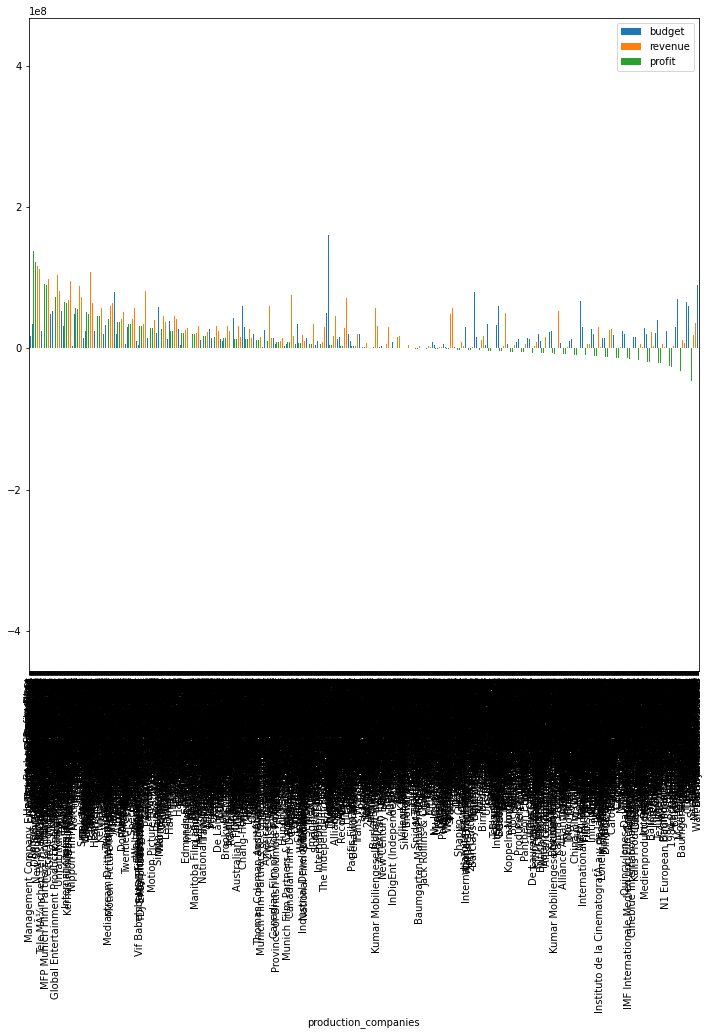

In [299]:
money_columns=['budget','revenue','profit','production_companies']
exploded_companies.loc[:,exploded_companies.columns.isin(money_columns)].groupby('production_companies').mean(
).sort_values(ascending=False, by=['profit','revenue']).plot(kind='bar', figsize=(12,12), rot=90)

Looks like there are a lot of companies, so it is better to filter them by the most profitable ones to find an answer to the question

In [300]:
most_profitable = companies['profit'].sum().sort_values( ascending=False)
names=most_profitable.head(30).index
names

Index(['Paramount Pictures', 'Universal Pictures', 'Warner Bros.',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Touchstone Pictures', 'Walt Disney Pictures',
       'Columbia Pictures Corporation', 'New Line Cinema',
       'Regency Enterprises', 'TriStar Pictures', 'Working Title Films',
       'Amblin Entertainment', 'Relativity Media', 'Dimension Films',
       'Fox 2000 Pictures', 'Screen Gems', 'Channel Four Films',
       '20th Century Fox', 'DreamWorks SKG', 'Miramax Films',
       'Mirage Enterprises', 'United Artists', 'Malpaso Productions',
       'Don Simpson/Jerry Bruckheimer Films', 'DreamWorks',
       'Hollywood Pictures', 'PolyGram Filmed Entertainment',
       'Tig Productions', 'Scott Rudin Productions'],
      dtype='object', name='production_companies')

In [301]:
successful=exploded_companies[exploded_companies.production_companies.isin(names)]
successful.head()

,index,popularity,budget,revenue,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit,profit_adj,money_back_percent
7,124,1.338322,10000000,78099553,Chris J. Murray|Brit Shaw|Ivy George|Lauren Fr...,Gregory Plotkin,terror|supernatural|sequel|demon|found footage,88,Horror|Thriller,Paramount Pictures,2015-10-21,267,5,9199995,71851557,68099553,62651562,7.809955
17,131,1.278928,20000000,43967255,Thomas Haden Church|Josh Wiggins|Lauren Graham...,Boaz Yakin,afghanistan|war|based on true story|rescue|bet...,111,Adventure|Drama|Family,Warner Bros.,2015-06-26,214,7,18399991,40449856,23967255,22049865,2.198363
35,160,0.950793,12000000,60273173,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,2015-09-11,122,5,11039995,55451294,48273173,44411299,5.022764
36,162,0.937620,10000000,7587485,Ben Stiller|Naomi Watts|Adam Driver|Amanda Sey...,Noah Baumbach,marriage|middle age,97,Drama|Comedy,Scott Rudin Productions,2015-03-27,265,5,9199995,6980483,-2412515,-2219512,0.758749
78,211,0.661163,14000000,12314651,Rob Corddry|Craig Robinson|Clark Duke|Adam Sco...,Steve Pink,time travel|sequel|hot tub|duringcreditsstinger,93,Comedy,Paramount Pictures,2015-02-20,244,5,12879994,11329473,-1685349,-1550521,0.879618


In [302]:
successful.shape

(1323, 18)

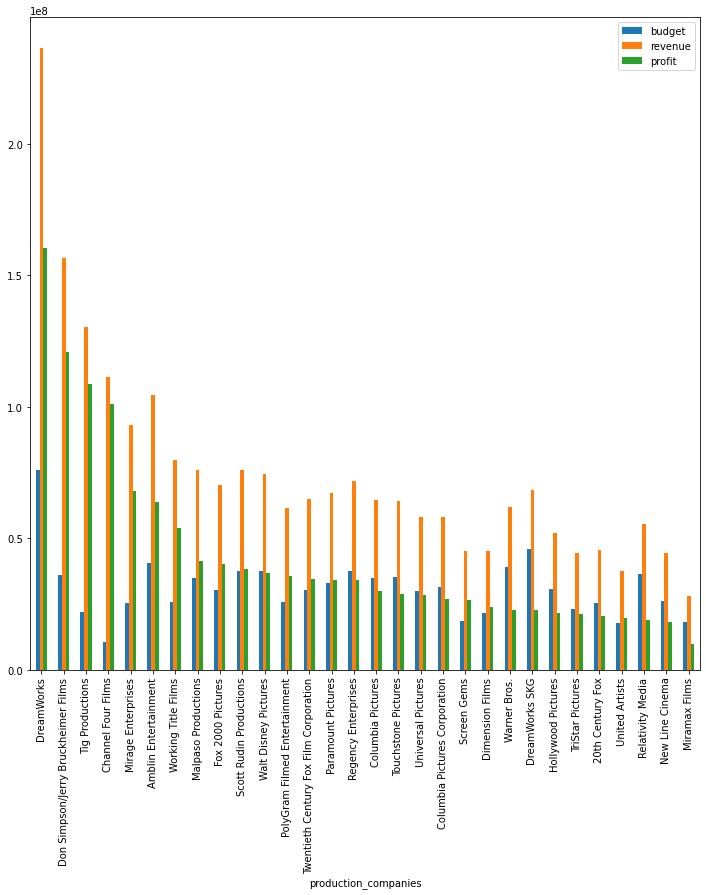

In [303]:
successful.loc[:,successful.columns.isin(money_columns)].groupby('production_companies').mean(
).sort_values(ascending=False, by=['profit','revenue']).plot(kind='bar', figsize=(12,12), rot=90)

In [304]:
successful['movie_success']= successful.revenue > successful.budget

/Users/kareem.abdelsalam/Downloads/Program/anaconda3/envs/de-jobs/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


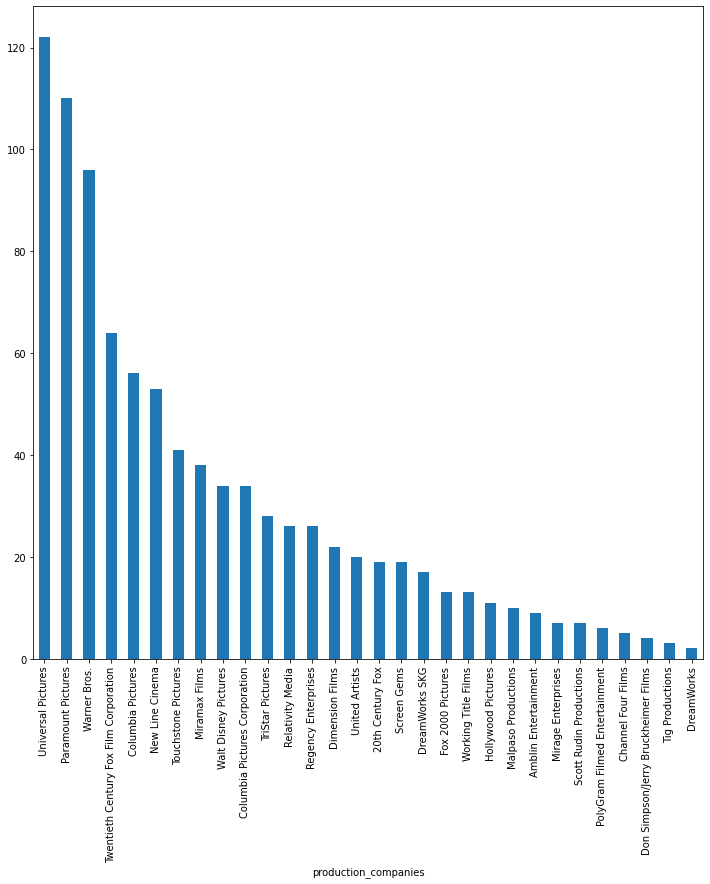

In [305]:
successful[successful.revenue > successful.budget].groupby(
    'production_companies').index.count(
).sort_values(
    ascending=False).plot(kind='bar', figsize=(12,12))

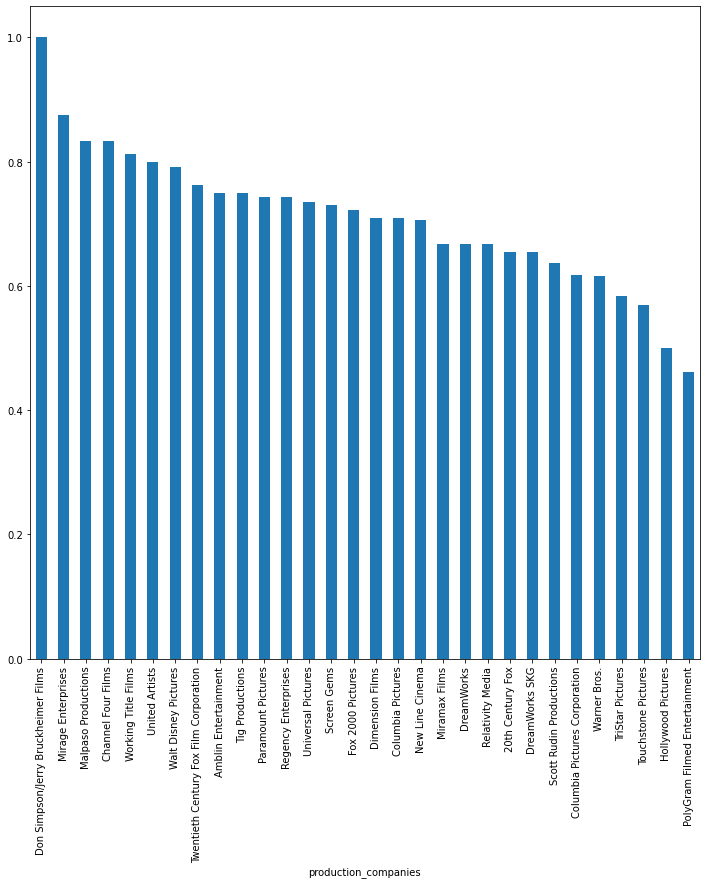

In [306]:
success_percent = successful.groupby('production_companies').movie_success.value_counts(normalize=True)[:,1]
success_percent.sort_values(ascending=False).plot(kind='bar',figsize=(12,12))

By looking at the percentage of movies per company that broke even (revenue >= budget) it looks at first that Don Simpson company did it and found the equation but when looking at the movie counts chart it seems that the first 6 companies in success rates have less than 20 movies we cannot guarantee this conclusion.

In conclusion Walt Disney Pictures and Twentieth Century Fox Film Corporation seem to be the most successful companies having 35+ movies and more than 75% success rate

# Conclusion

In this Analysis I have explored about 2000 movies out of the 10k ones available in the dataset, these were considered 'normal' movies which means they had normal values in columns and less outliers than the orginal dataset.


I have seeked answers to 3 main questions:

**1- How much revenue returns to the investors compared to the budget ?**
The answer to this one is that it ranges from 0 to about 400 times ! The normal range is between 0 and 5, this is where most movies lie, and most of those have the revenue less than 3 times the initial budget.
This is an important question for investors in order to have their expectations straight.

**2- Does certain movie genres have better chances at getting more revenue and profits ?**
Family, Comedy, Music and Romance have good chances of success as an investment especially Comedy and Music as they have high profits, relatively lower budgets and more chances of success.

**3- Have certain production companies found a recipe for success of a movie (high success percentages) ?**
By Analyzing the Production companies that have a decent number of produced movies it looks like 'Walt Disney Pictures' and 'Twentieth Century Fox Film Corporation'  are having a 75%+ success rate for their 35+ movies.


Removing about 80% of the data is a big limitation but it was necessary given that the analysis focuses on financial features which were not clean in most of the removed data points.
The conclusions were based on the categories having large enough samples to be generalized due to having few data points in some categories like some movie genres and some production companies.
